# Importing The Modules

In [458]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Importing The Boston House Price Dataset

In [459]:
from sklearn.datasets import load_boston
boston = load_boston()

In [460]:
df = pd.DataFrame(boston.data)

In [461]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [462]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

In [463]:
df['PRICE'] = boston.target

In [464]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Analysing the Data

In [465]:
df.shape

(506, 14)

In [466]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [467]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [468]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [469]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [470]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

So, there are no null values in our data

# Graphical Analysis

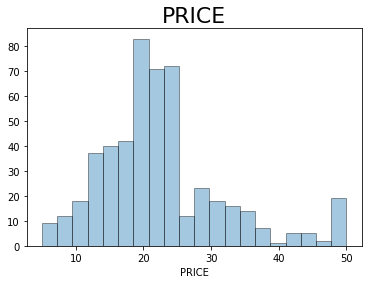

In [471]:
plt.title('PRICE',size='22')
sns.distplot(df['PRICE'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
plt.show()   

In [472]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

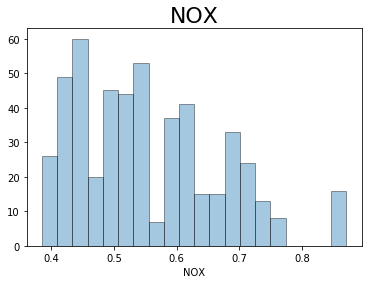

In [473]:
plt.title('NOX',size='22')
sns.distplot(df['NOX'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
plt.show()   # We can see that there is low nitric oxide concentration around most houses.

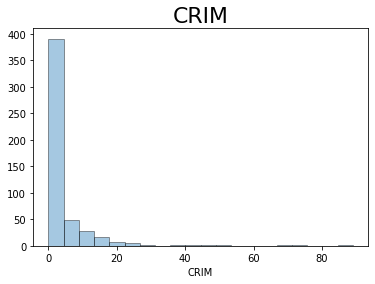

In [474]:
plt.title('CRIM',size='22')
sns.distplot(df['CRIM'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
plt.show() # Most of the houses don't have any criminal rate

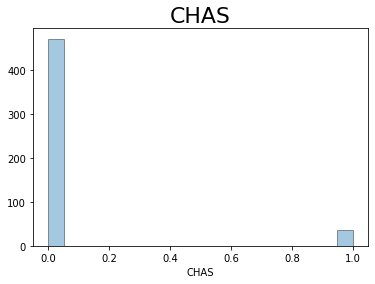

In [475]:
plt.title('CHAS',size='22')
sns.distplot(df['CHAS'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
plt.show()  # Maximum numer of houses have tract bounds river.

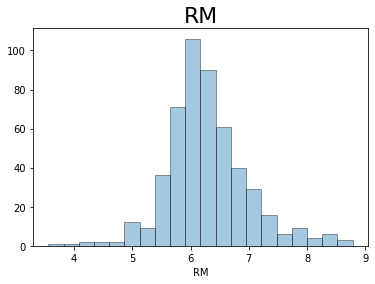

In [476]:
plt.title('RM',size='22')
sns.distplot(df['RM'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
plt.show()  # Very few houses have less than 5 number of room. Maximum number of rooms is around 6~7.

24.0


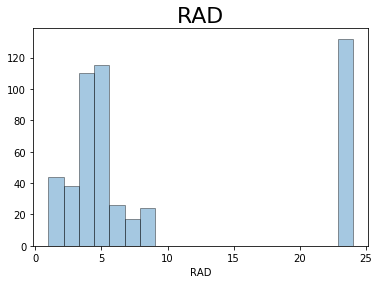

In [477]:
plt.title('RAD',size='22')
sns.distplot(df['RAD'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
print(df['RAD'].max())
plt.show()  # Most of the houses have easy access to radial highways.

711.0


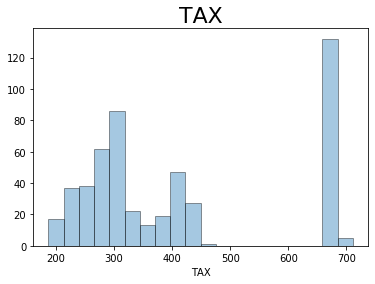

In [478]:
plt.title('TAX',size='22')
sns.distplot(df['TAX'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
print(df['TAX'].max())
plt.show()  # Most houses have tax less than 450. Maximum houses are paying around 690$ per 10,000$.

22.0


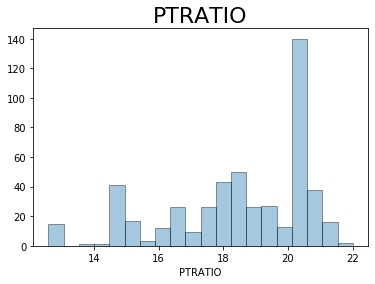

In [479]:
plt.title('PTRATIO',size='22')
sns.distplot(df['PTRATIO'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
print(df['PTRATIO'].max())
plt.show() # Maximum houses have AROUND 20 pupil-teacher ratio by town.

37.97


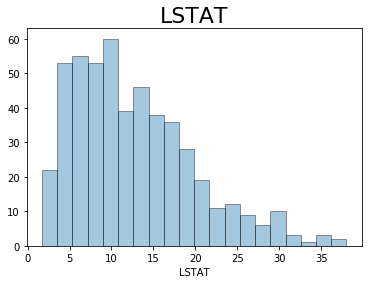

In [480]:
plt.title('LSTAT',size='22')
sns.distplot(df['LSTAT'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1), bins=20)
print(df['LSTAT'].max())
plt.show()

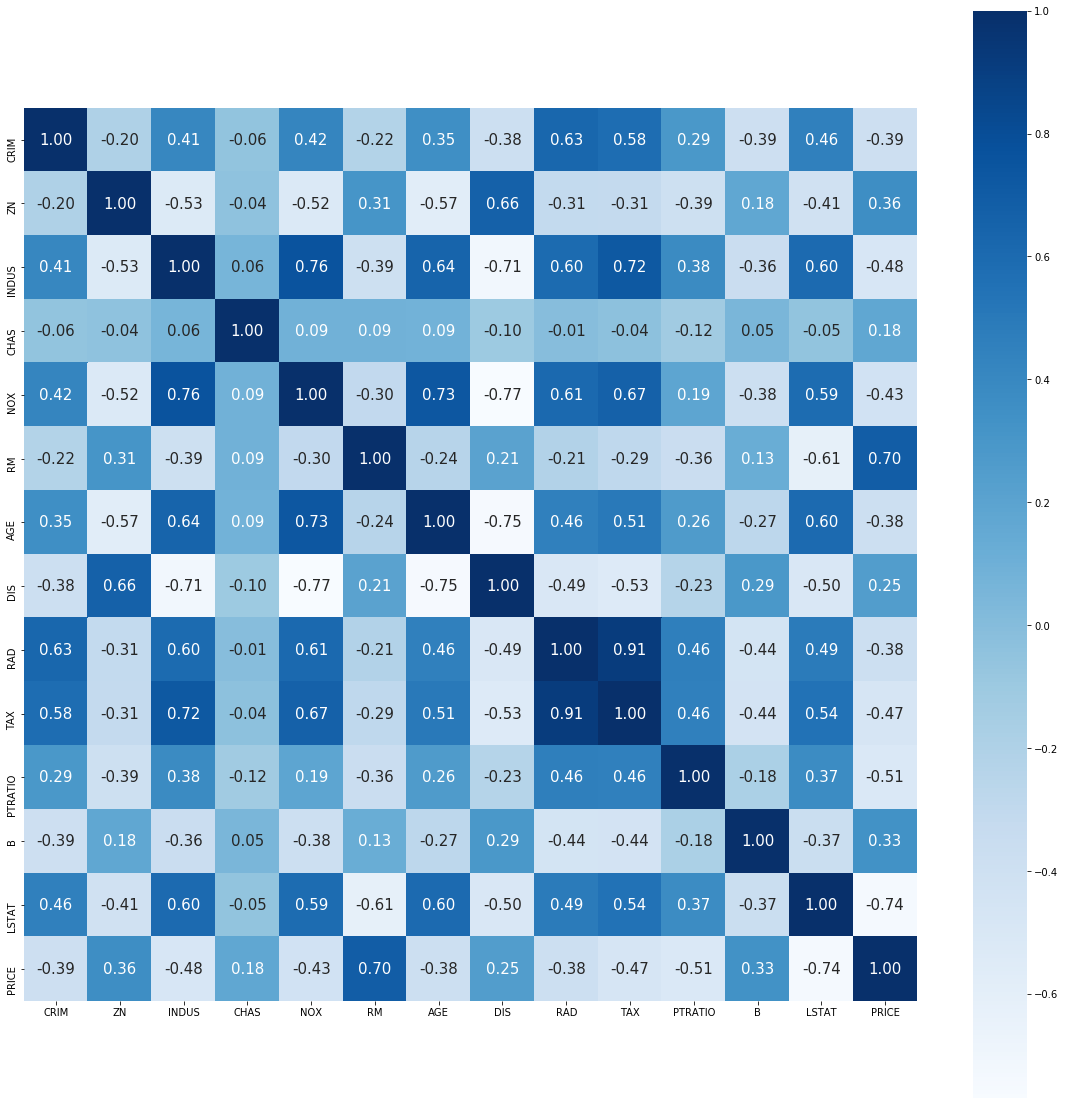

In [481]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Blues')

# Checking for outliers

Outlier removal will help in reducing errors and improving accuracy of our model.

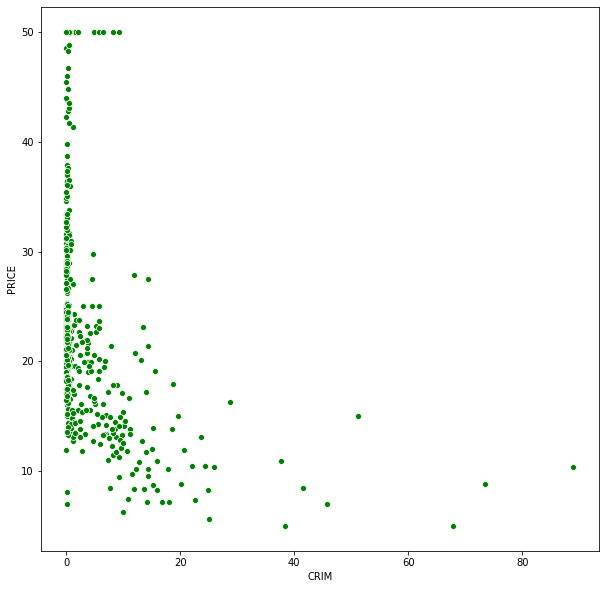

In [482]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='PRICE', data=df)
# plt.show()  # We can see, there are outliers here
plt.figure(figsize=(10,10))
sns.scatterplot(x="CRIM", y="PRICE", data=df,color='green')
plt.show()

In [483]:
df.drop(df[df['CRIM']>60].index, axis=0, inplace=True)

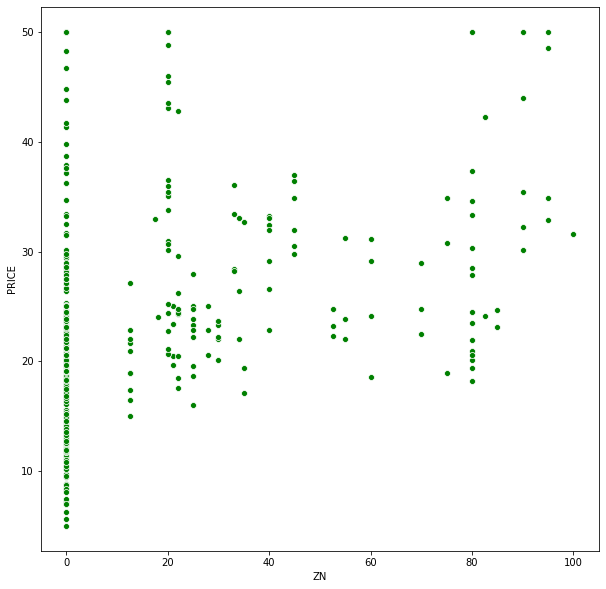

In [484]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="ZN", y="PRICE", data=df,color='green')
plt.show()    #no outlier

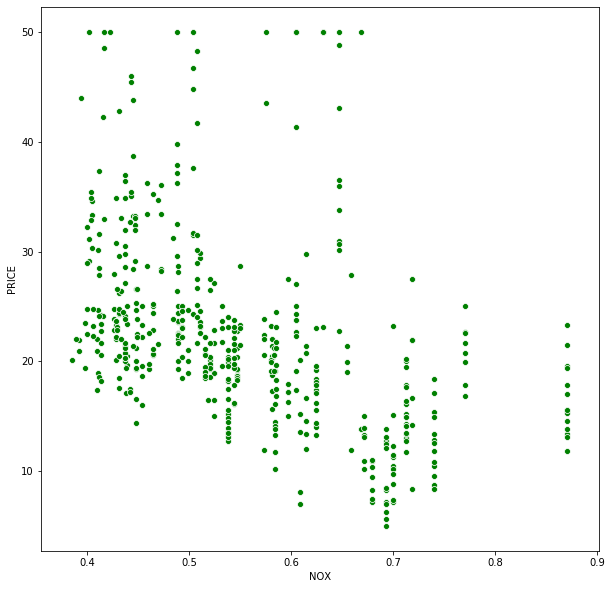

In [485]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="NOX", y="PRICE", data=df,color='green')
plt.show()  #no outlier

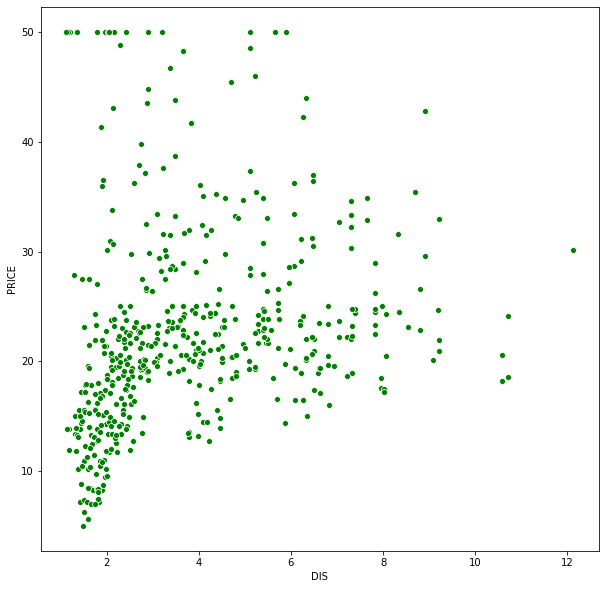

In [486]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="DIS", y="PRICE", data=df,color='green')
plt.show() # We can consider the DIS values above 12 as outliers and can remove them

In [487]:
df.drop(df[df['DIS']>60].index, axis=0, inplace=True)

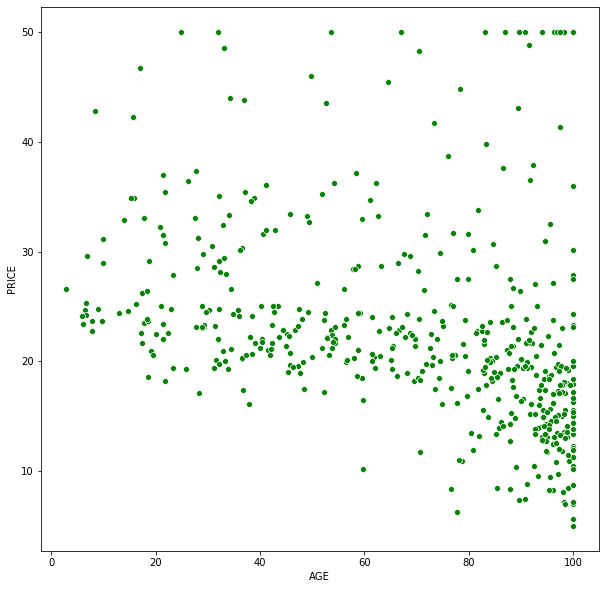

In [488]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="AGE", y="PRICE", data=df,color='green')
plt.show()  #no outlier detected

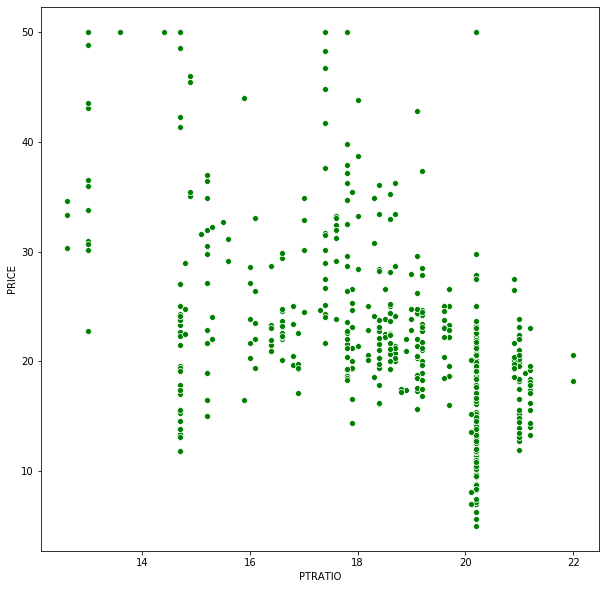

In [489]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PTRATIO", y="PRICE", data=df,color='green')
plt.show()

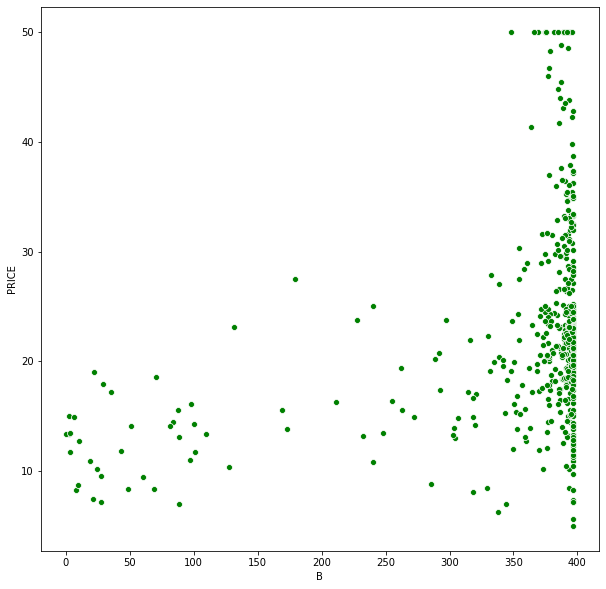

In [490]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="B", y="PRICE", data=df,color='green')
plt.show()  # Lets remove that are less than 0.

In [491]:
df.drop(df[df['B']<0].index, axis=0, inplace=True)

# Converting into a numpy array

In [492]:
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

In [493]:
X.shape

(503, 13)

In [494]:
y.shape

(503,)

# Making the training and the test set

In [495]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [496]:
X_train.shape

(352, 13)

In [497]:
y_train.shape

(352,)

In [498]:
X_test.shape

(151, 13)

In [499]:
y_test.shape

(151,)

# Linear Regression

## Training the model

In [500]:
from sklearn.linear_model import LinearRegression
Linear_regressor = LinearRegression()
Linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the results 

In [501]:
y_pred = Linear_regressor.predict(X_test)

In [502]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))

print('Train set acc:',Linear_regressor.score(X_train,y_train),'\nTest set acc:',Linear_regressor.score(X_test,y_test))
y_pred

R^2: 0.7460783676165998
Mean Absolute Error: 3.6826875004327806
Mean Squared Error: 25.42462391342023
Train set acc: 0.7181574106727893 
Test set acc: 0.7460783676166


array([10.2236284 ,  8.42017855, 34.09605762, 14.40343292, 24.24285771,
       16.67059748, 21.01112802, 14.70103394, 33.85842484, 40.01676415,
        8.17257257, 22.42312328, 17.12958675, 30.9603829 , 19.85705755,
       14.34819873, 21.35912446, 21.40300307, 40.57812851, 14.24578016,
        8.25193451, 17.52758254, 23.50873293, 17.58216865, 20.19026333,
       16.18576736, 22.40142304, 38.00830625, 17.16161731, 36.12920425,
       33.19801522, 27.86468956, 19.65197479, 30.26034032, 26.19293587,
       25.1819946 , 20.36352402, 24.26351398, 24.02787908, 24.56607831,
       35.36871885, 32.59359213, 22.58010289, 32.18093368, 20.09052895,
       18.98717307, 16.50455767, 15.8818157 , 20.42261774, 12.85058133,
       20.35446293, 18.33850188, 17.62554557, 13.2262451 , 26.36518802,
       24.83032332, 20.80525411, 16.95314407, 28.60216913, 30.20390084,
       38.63638122, 30.25693902, 13.38809453, 14.55227007, 40.97189025,
       23.14170222, 22.00766873, 37.1319045 , 30.57981497, 30.47

## Visualising the predictions

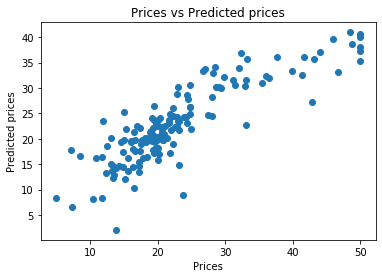

In [503]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Desicion Tree Regressor

## Training the Model

In [508]:
from sklearn.tree import DecisionTreeRegressor   
DT_regressor = DecisionTreeRegressor()  
DT_regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Predicting the Results 

In [509]:
y_pred_DTR = DT_regressor.predict(X_test)

In [511]:
print('R^2:',metrics.r2_score(y_test, y_pred_DTR))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred_DTR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred_DTR))
print('Train set acc:',DT_regressor.score(X_train,y_train),'\nTest set acc:',DT_regressor.score(X_test,y_test))
y_pred_DTR

R^2: 0.7875761927817885
Mean Absolute Error: 3.098013245033113
Mean Squared Error: 21.269536423841057
Train set acc: 1.0 
Test set acc: 0.7875761927817885


array([14.5,  5.6, 31.6, 15.7, 23.9, 12.1, 23.1, 17.1, 33.1, 50. ,  8.1,
       20.6, 23.8, 33.4, 20. , 13.4, 18.5, 22. , 36. , 14.8, 15.6, 19.5,
       20.3, 19.5, 21.2, 17.1, 20.6, 36. , 15.6, 44.8, 43.8, 32. , 20.2,
       21.4, 22.3, 29.8, 17.6, 23.9, 21.2, 23.3, 44.8, 23.6, 15.6, 24.1,
       16.1, 23.2,  8.3, 19.2, 29.6, 12.7, 20.5, 19.4, 19.7,  8.4, 19.7,
       23.1, 21.7, 20.6, 22.2, 33.2, 36. , 21.2, 15.7, 15.1, 50. , 23.2,
       19.6, 42.3, 30.8, 33.3, 23.1, 23.9, 22.8, 12.1, 36.5, 14.5, 21.2,
       23.2, 22. , 20. , 18.1, 26.6, 17.6, 20. , 21.4, 18.7, 15.6, 20.6,
        8.8, 15.7, 16.1, 38.7, 25. , 21.2, 14.3, 35.1, 13.8, 22.2, 13.6,
       14.5, 13.8, 25. , 16.8, 20.4, 30.8, 36. , 23.8, 22. , 14.5, 15.2,
       14.4, 31.5, 33.1, 37.9, 24.1, 22. , 21.2, 17.5, 16.2, 15.2, 33.4,
       16.8, 29. , 30.5, 44.8, 11. , 14.8, 30.3, 23.6, 15.1, 19.6, 14.4,
       37.3, 21.8, 15.6, 25. , 21.4, 19.4, 16.2, 16.8, 23.2, 20.6, 48.3,
       17.8, 14.1, 16.8, 43.5, 33.4, 27.9, 22.6, 22

## Visualising the predictions 

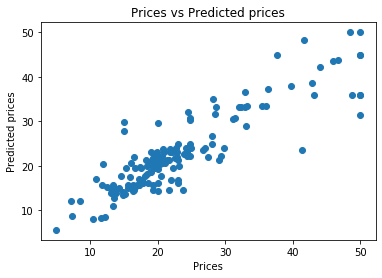

In [512]:
plt.scatter(y_test, y_pred_DTR)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()